In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

#### The data is for predicting if a client is a possible good or bad client

In [22]:
# Load your data into a DataFrame
data = pd.read_csv("clean_data.csv")
data.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [23]:
data.isna().sum()

ID                 0
Gender             0
Own_car            0
Own_property       0
Work_phone         0
Phone              0
Email              0
Unemployed         0
Num_children       0
Num_family         0
Account_length     0
Total_income       0
Age                0
Years_employed     0
Income_type        0
Education_type     0
Family_status      0
Housing_type       0
Occupation_type    0
Target             0
dtype: int64

In [4]:
label_encoder = LabelEncoder()
data['Income_type'] = label_encoder.fit_transform(data['Income_type'])
data['Education_type'] = label_encoder.fit_transform(data['Education_type'])
data['Family_status'] = label_encoder.fit_transform(data['Family_status'])
data['Housing_type'] = label_encoder.fit_transform(data['Housing_type'])
data['Occupation_type'] = label_encoder.fit_transform(data['Occupation_type'])

In [19]:
# from sklearn.preprocessing import OneHotEncoder

# # Categorical columns to encode
# columns_to_encode = ['Income_type', 'Education_type', 'Family_status', 'Housing_type', 'Occupation_type']

# # Create a OneHotEncoder instance
# one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')

# # Encode categorical columns and replace them in the dataset
# encoded_cols = one_hot_encoder.fit_transform(data[columns_to_encode])
# encoded_df = pd.DataFrame(encoded_cols, columns=one_hot_encoder.get_feature_names_out(columns_to_encode))

# # Replace original columns with encoded columns
# data = pd.concat([data.drop(columns=columns_to_encode), encoded_df], axis=1)


In [8]:
data.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,...,Occupation_type_Low-skill Laborers,Occupation_type_Managers,Occupation_type_Medicine staff,Occupation_type_Other,Occupation_type_Private service staff,Occupation_type_Realty agents,Occupation_type_Sales staff,Occupation_type_Secretaries,Occupation_type_Security staff,Occupation_type_Waiters/barmen staff
0,5008804,1,1,1,1,0,0,0,0,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5008806,1,1,1,0,0,0,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5008808,0,0,1,0,1,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,5008812,0,0,1,0,0,0,1,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5008815,1,1,1,1,1,1,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Split the data into features and target variable
X = data.drop(columns=["Target"])
y = data["Target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
y_pred = clf.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7729145211122554


In [13]:
y.value_counts()

0    8426
1    1283
Name: Target, dtype: int64

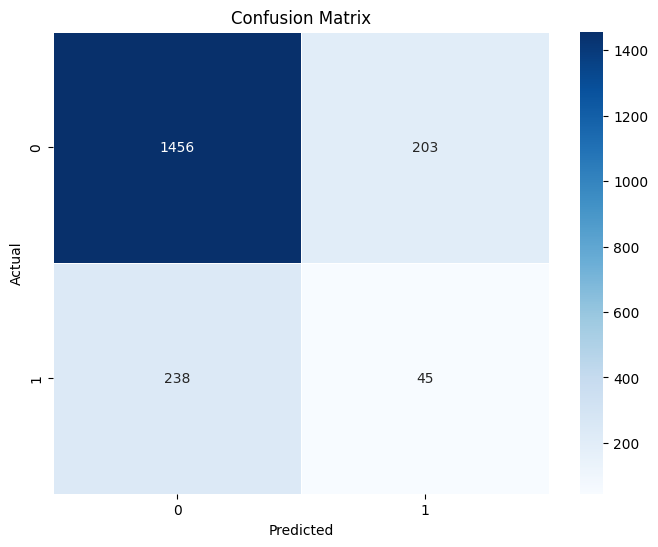

In [14]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [15]:
f1= f1_score(y_test, y_pred)
print(f"F1-Score: {f1}")

F1-Score: 0.16949152542372883
